In [1]:
import Prims
import Kruskal
import Visualise
import random
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_density(V, E):
    # Density of a graph
    density = 2*E/(V*(V-1)) #Unit: No. E/ No. nodes
    return density

# Cases for generating graph
def generate_graph(density, num_vertices, num_edges):
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for u in range(num_vertices):
        for v in range(u + 1, num_vertices):
            if num_edges > 0:
                weight = random.randint(1, 10)
                graph[u][v] = weight
                graph[v][u] = weight
                num_edges -= 1
    return graph

def generate_negative_weighted_graph(num_vertices):
    graph = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    for u in range(num_vertices):
        for v in range(u + 1, num_vertices):
            weight = random.randint(-10,10)
            graph[u][v] = weight
            graph[v][u] = weight
    return graph

Time taken from Kruskal: 0.03749966621398926


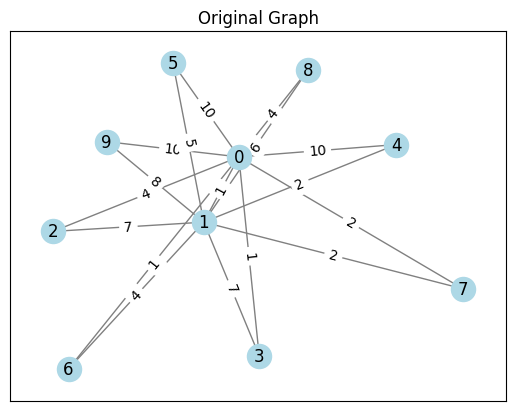

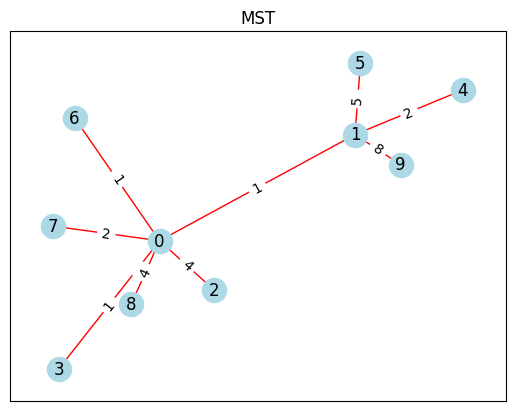

<Figure size 640x480 with 0 Axes>

In [42]:
# Case 1: Sparse Graph
num_vertices = 10  # Input
num_edges = 17 #Input (density = 0.3778)
density = get_density(num_vertices, num_edges)
graph = generate_graph(density, num_vertices, num_edges)

start = time.time()
result, mst_weight = Prims.prim_mst(graph)
#Prims.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Kruskal:", end - start)

Time taken from Prims: 0.07963848114013672


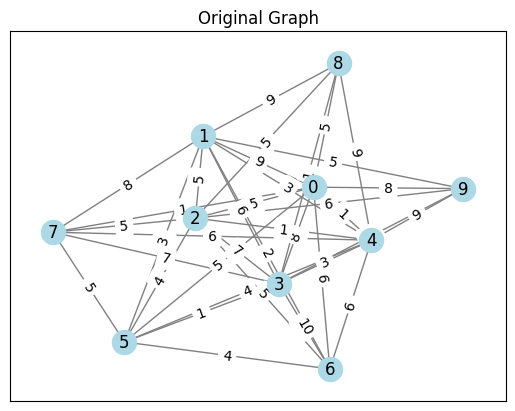

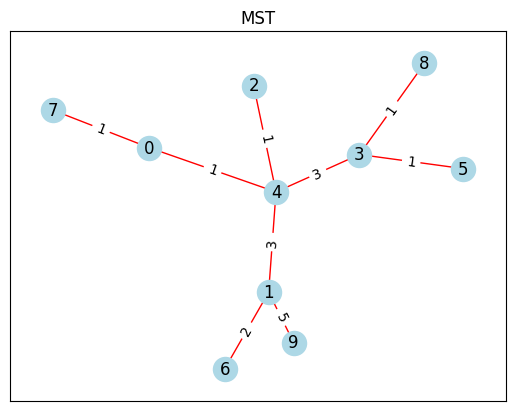

<Figure size 640x480 with 0 Axes>

In [12]:
# Case 2: Dense Graph
num_vertices = 10  # Input
num_edges = 37 #Input (density = 0.8222)
density = get_density(num_vertices, num_edges)
graph = generate_graph(density, num_vertices, num_edges)

start = time.time()
result, mst_weight = Prims.prim_mst(graph)
#Prims.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Prims:", end - start)

Time taken from Prims: 0.05229067802429199


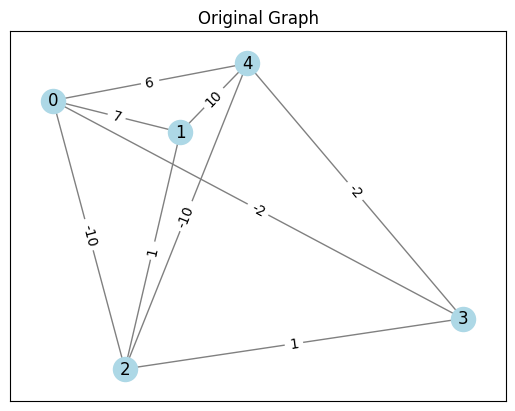

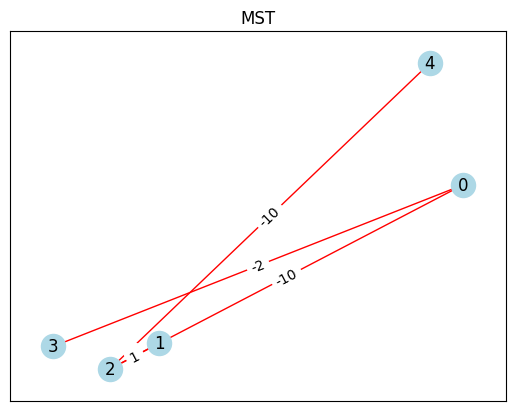

<Figure size 640x480 with 0 Axes>

In [11]:
# Case 3: Negative-weighted Graph
negative_graph = generate_negative_weighted_graph(num_vertices=5)
start = time.time()
result, mst_weight = Prims.prim_mst(negative_graph)
# Prims.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, negative_graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Prims:", end - start)

<Figure size 640x480 with 0 Axes>

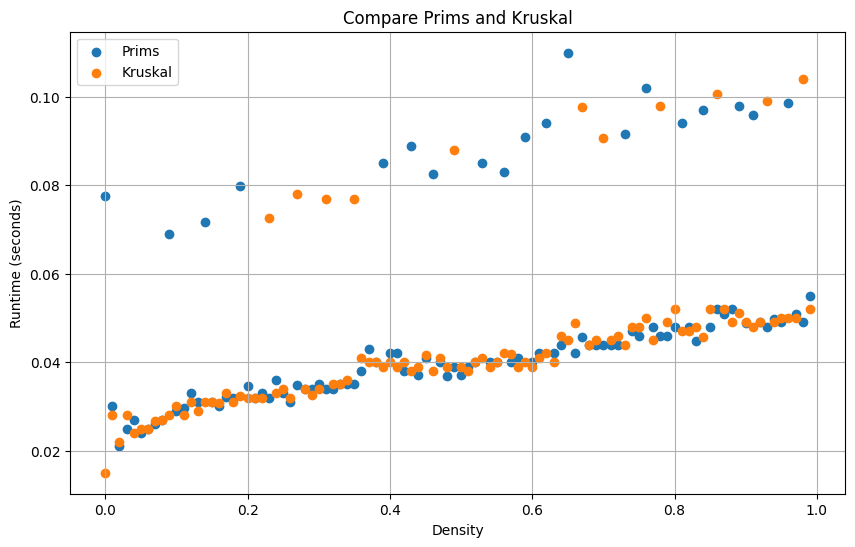

In [5]:
#Analysis: Runtime with different density on both algorithm
num_nodes = 17
density = 100

list_time_prims = []
list_time_kruskals = []
list_density = []
for i in range(density):
    calculate_density = i/100
    num_edges = int((calculate_density * (num_nodes * (num_nodes - 1)) / 2))
    graph = generate_graph(calculate_density, num_nodes, num_edges)

    # Time complexity Prim's
    start_time1 = time.time()
    result1, mst_weight1 = Prims.prim_mst(graph)
    G_original1, G_mst1 = Visualise.create_graph(result1, graph)
    Visualise.draw_delete_graph_for_runtime(G_original1, G_mst1)
    end_time1 = time.time()
    list_time_prims.append((end_time1 - start_time1))

    # Time complexity Kruskal's
    start_time2 = time.time()
    result2, mst_weight2 = Kruskal.kruskal_mst(graph)
    G_original2, G_mst2 = Visualise.create_graph(result2, graph)
    Visualise.draw_delete_graph_for_runtime(G_original2, G_mst2)
    end_time2 = time.time()
    list_time_kruskals.append((end_time2 - start_time2))
    list_density.append(calculate_density)

df = pd.DataFrame({'Density': list_density, 'Prims': list_time_prims, 'Kruskal': list_time_kruskals})
plt.figure(figsize=(10, 6))
plt.scatter(df['Density'], df['Prims'])
plt.scatter(df['Density'], df['Kruskal'])
plt.title('Compare Prims and Kruskal')
plt.xlabel('Density')
plt.ylabel('Runtime (seconds)')
plt.legend(['Prims', 'Kruskal'])
plt.grid(True)
plt.show()

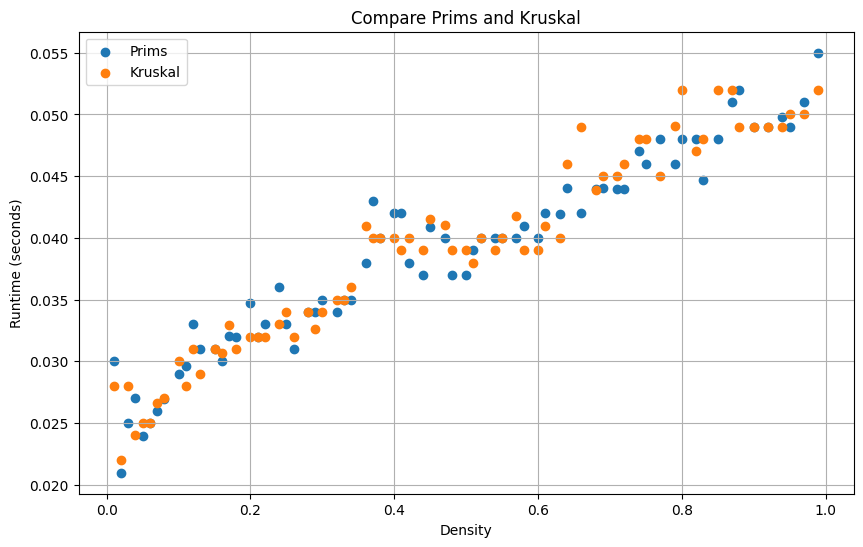

In [8]:
visualise_df = df[(df['Prims'] < 0.06) & (df['Kruskal'] < 0.06)]

plt.figure(figsize=(10, 6))
plt.scatter(visualise_df['Density'], visualise_df['Prims'])
plt.scatter(visualise_df['Density'], visualise_df['Kruskal'])
plt.title('Compare Prims and Kruskal')
plt.xlabel('Density')
plt.ylabel('Runtime (seconds)')
plt.legend(['Prims', 'Kruskal'])
plt.grid(True)
plt.show()